# Notebook Setup

In [1]:
!which python

/opt/anaconda3/envs/learnIris/bin/python


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [59]:
# Standard imports

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Local imports

In [4]:
sns.set()

# Load Data

In [10]:
data = datasets.load_iris()

In [12]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Multiclass classification problem. Classes are setosa, versicolor & virginica

In [15]:
print(data['target_names'])

['setosa' 'versicolor' 'virginica']


In [18]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [19]:
df['target'] = data['target']

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Basic descriptive statistics

In [21]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


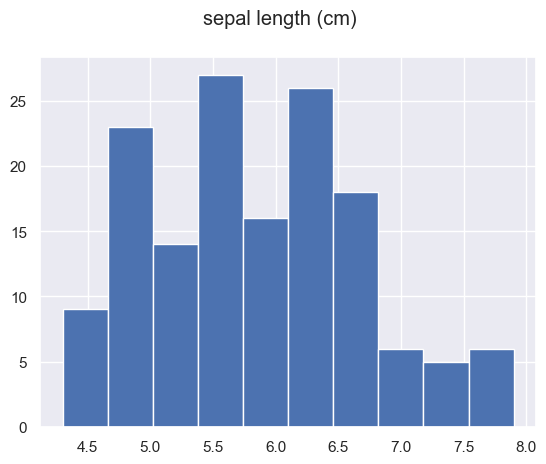

In [32]:
col = 'sepal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

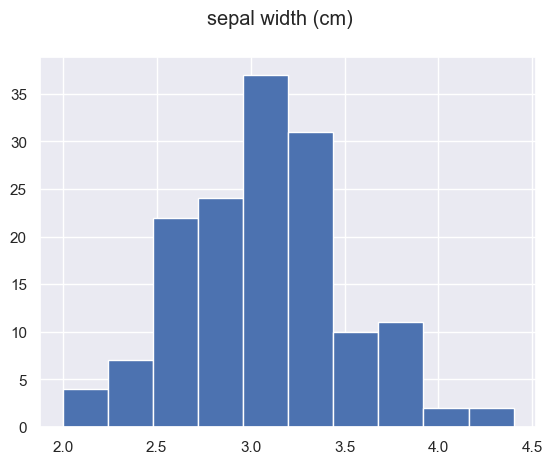

In [31]:
col = 'sepal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

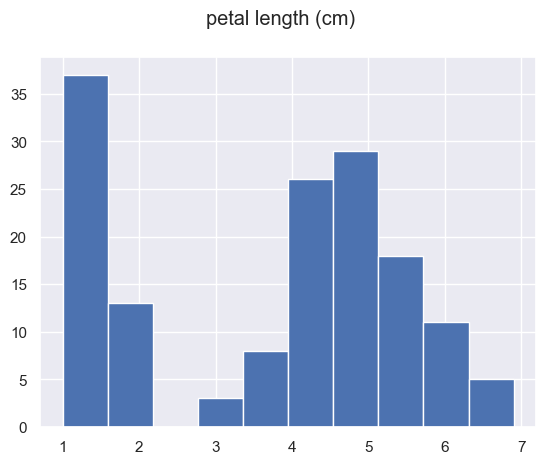

In [30]:
col = 'petal length (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

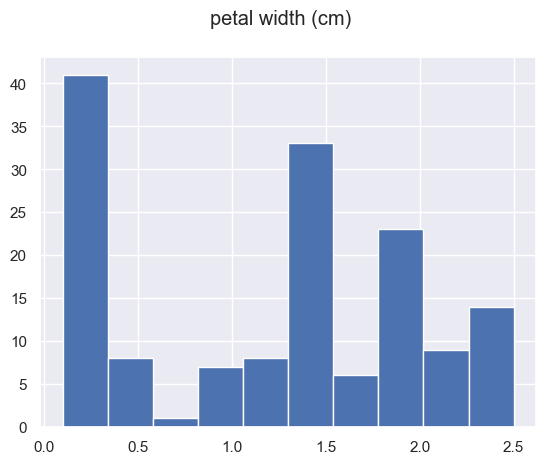

In [29]:
col = 'petal width (cm)'
df[col].hist()
plt.suptitle(col)
plt.show()

In [38]:
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


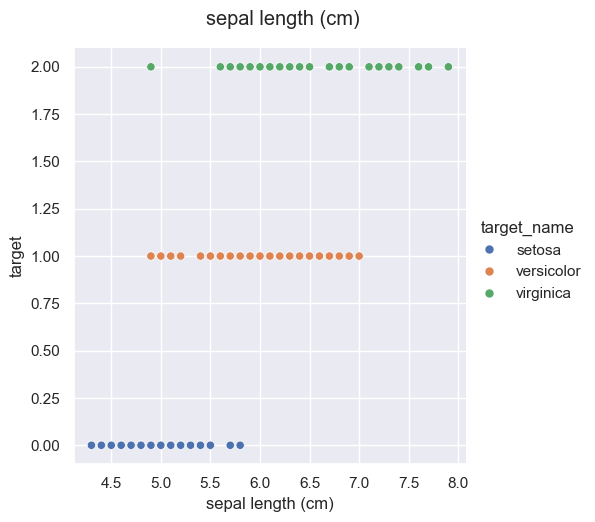

In [44]:
col = 'sepal length (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_ = plt.suptitle(col, y=1.04)

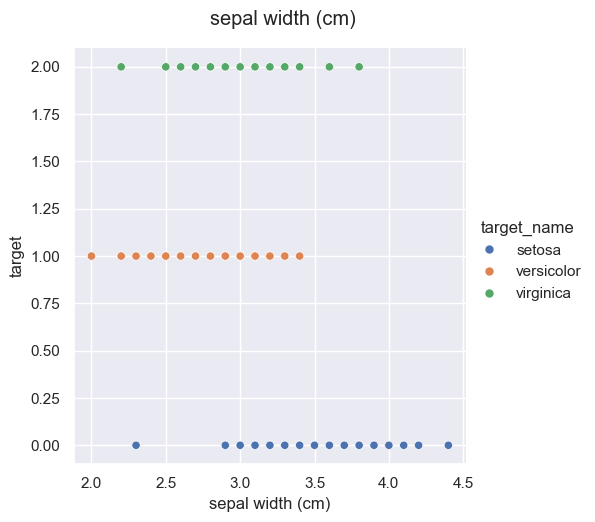

In [45]:
col = 'sepal width (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_ = plt.suptitle(col, y=1.04)

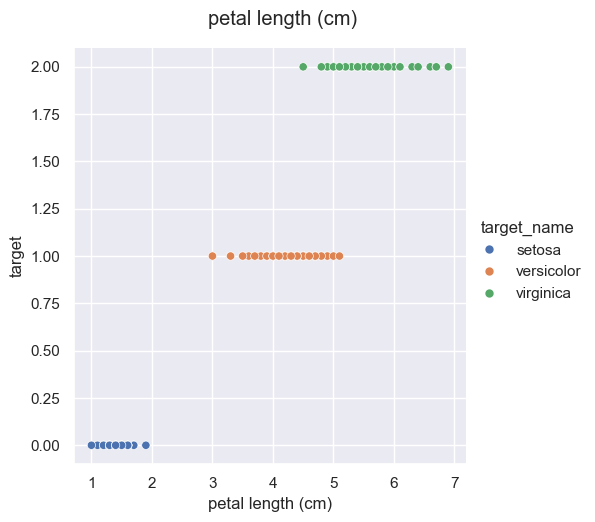

In [46]:
col = 'petal length (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_ = plt.suptitle(col, y=1.04)

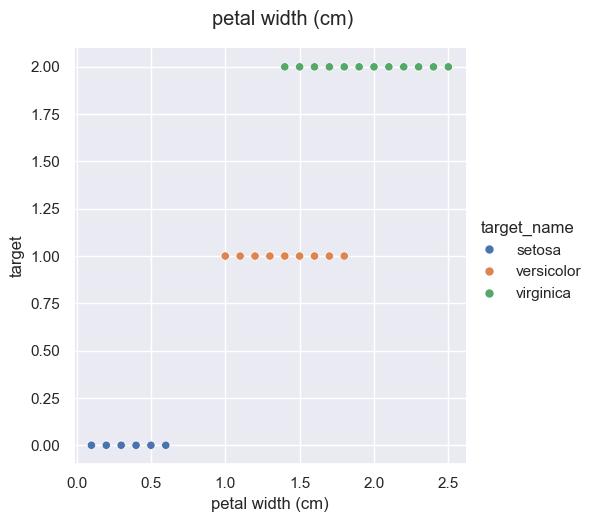

In [47]:
col = 'petal width (cm)'
sns.relplot(x=col, y='target', hue='target_name', data=df)
_ = plt.suptitle(col, y=1.04)

# Pairplots

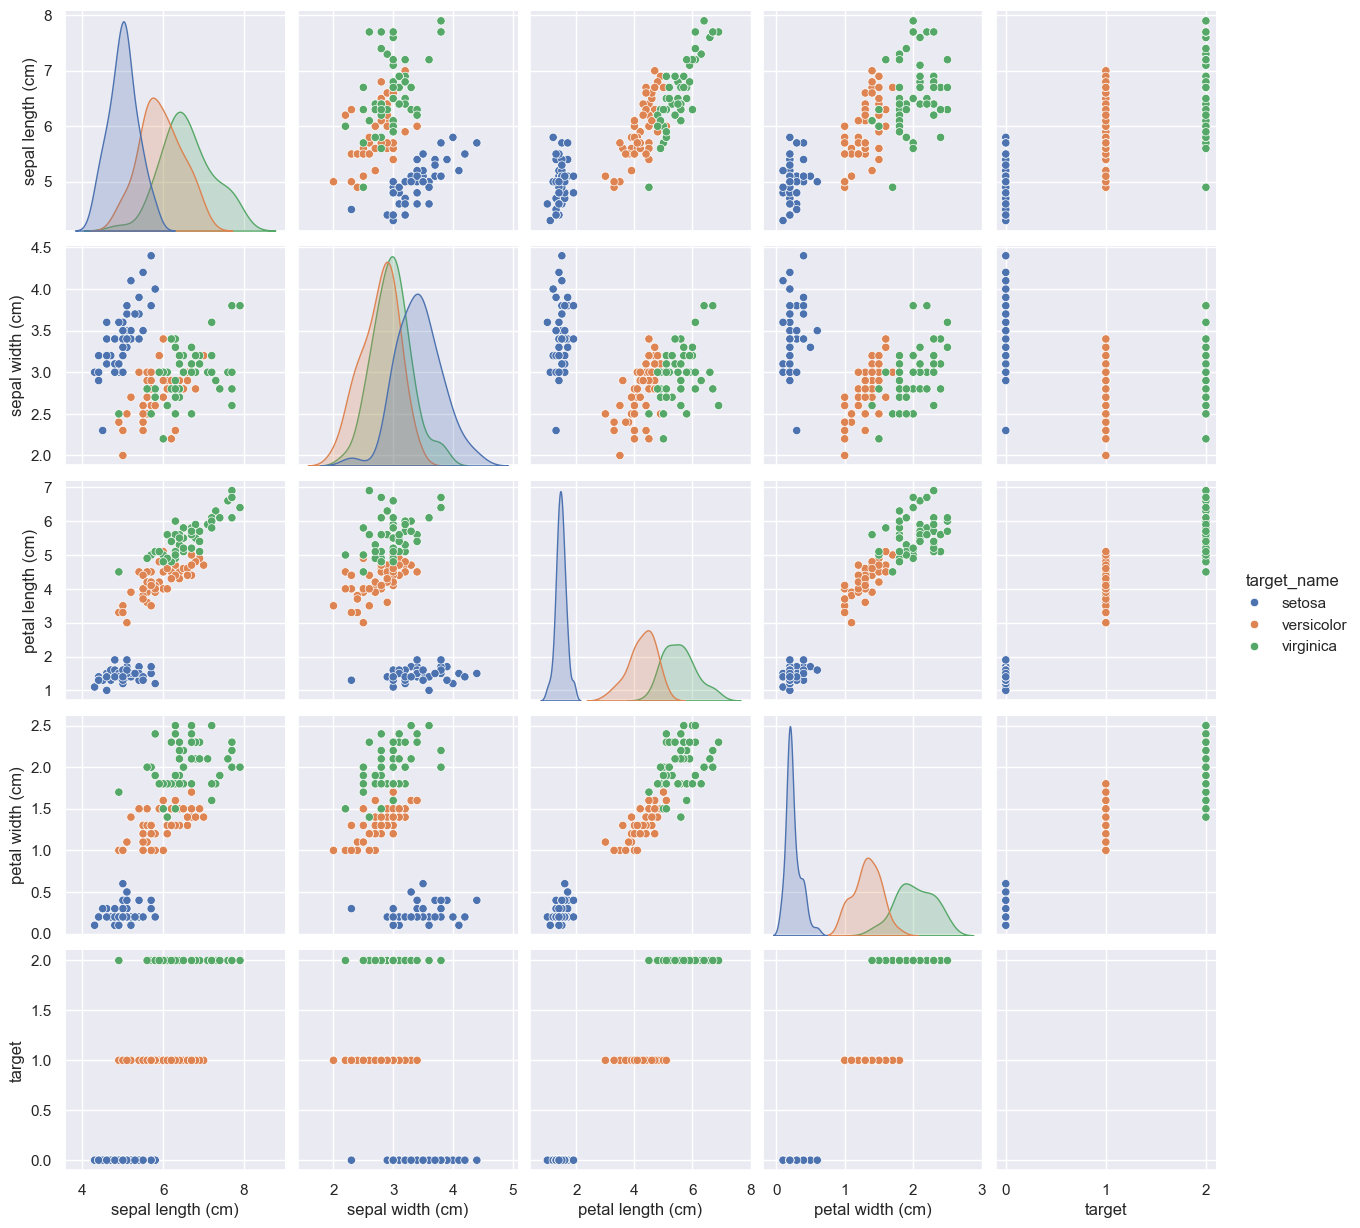

In [49]:
sns.pairplot(df, hue='target_name')

# Train test split

In [51]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [52]:
df_train.shape

(112, 6)

In [53]:
df_test.shape

(38, 6)

# Prepare data for modeling
Splitting the data back to numpy arrays

In [54]:
x_train = df_train.drop(columns=['target', 'target_name']).values
y_train = df_train['target'].values

# Modeling - logistic regression

### Preparing validation set for eval

In [68]:
# *t for training, *v for validation
xt, xv, yt, yv = train_test_split(x_train, y_train, test_size=0.25)

In [66]:
model = LogisticRegression()

In [67]:
model.fit(xt, yt)

LogisticRegression()

In [69]:
model.score(xv, yv)

0.9642857142857143